In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
import graphviz

%matplotlib inline

sns.set()

Import train dataset

In [2]:
def prepare_dataset(data):
    """
    function for preparing dataset to modeling: converts 'thal' into categories
    """
    data['thal'] = data['thal'].astype('category')
    data['thal'] = data['thal'].cat.codes
    return data

In [3]:
#import train values
values = pd.read_csv("train_values.csv", index_col=0)
prepare_dataset(values)
values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
#import train labels
labels = pd.read_csv("train_labels.csv", index_col=0)
labels.head()

,heart_disease_present
patient_id,
0z64un,0
ryoo3j,0
yt1s1x,1
l2xjde,1
oyt4ek,0


In [5]:
#merge values and labels into one dataset
data = values.merge(labels, how='left', left_index=True, right_index=True)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 14 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 26.1+ KB

In [7]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


Plot graphs to look at the data and find some insights

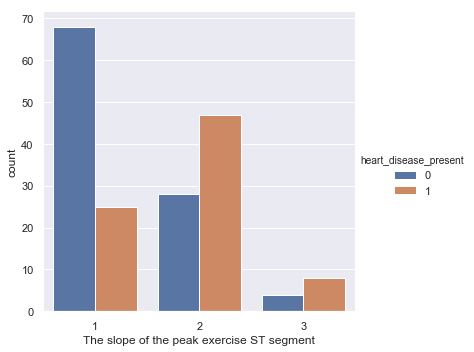

In [24]:
sns.catplot(x="slope_of_peak_exercise_st_segment", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('The slope of the peak exercise ST segment')
plt.show()

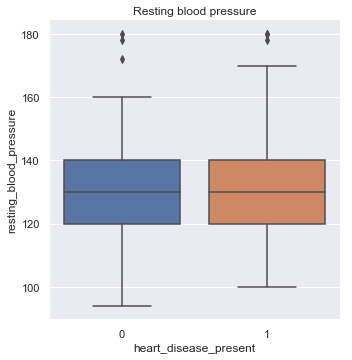

In [32]:
sns.catplot(y='resting_blood_pressure', x='heart_disease_present', kind="box", data=data)
plt.title('Resting blood pressure')
plt.show()

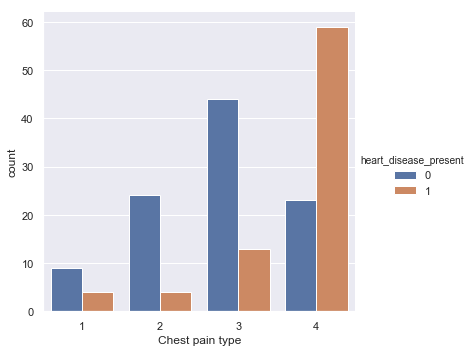

In [55]:
sns.catplot(x="chest_pain_type", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Chest pain type')
plt.show()

#Possible important feature

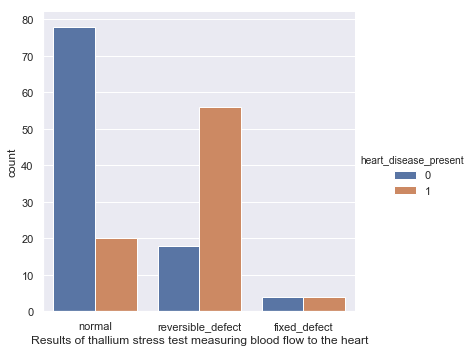

In [26]:
sns.catplot(x="thal", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Results of thallium stress test measuring blood flow to the heart')
plt.show()

#Possible important feature

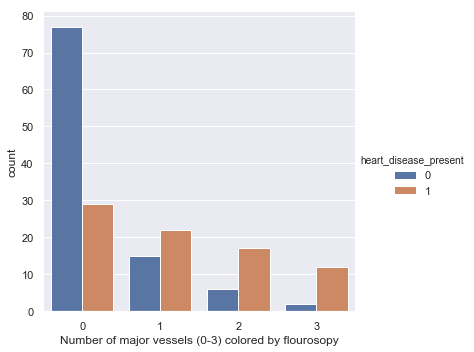

In [28]:
sns.catplot(x="num_major_vessels", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Number of major vessels (0-3) colored by flourosopy')
plt.show()

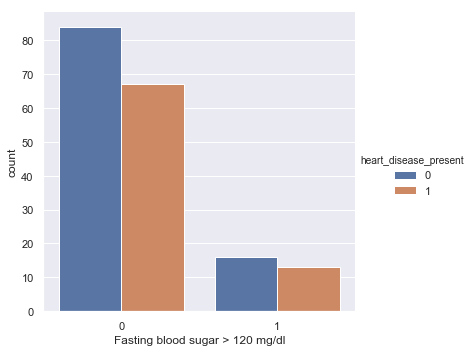

In [29]:
sns.catplot(x="fasting_blood_sugar_gt_120_mg_per_dl", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.show()

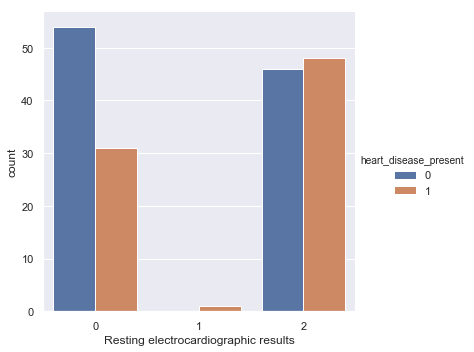

In [30]:
sns.catplot(x="resting_ekg_results", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Resting electrocardiographic results')
plt.show()

#Possible important feature

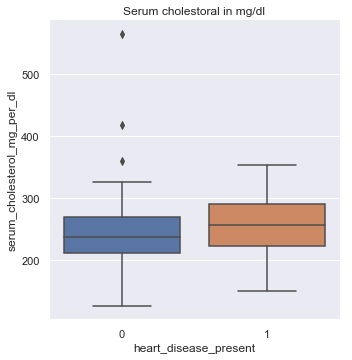

In [31]:
sns.catplot(y='serum_cholesterol_mg_per_dl', x='heart_disease_present', kind="box", data=data)
plt.title('Serum cholestoral in mg/dl')
plt.show()

#Possible important feature

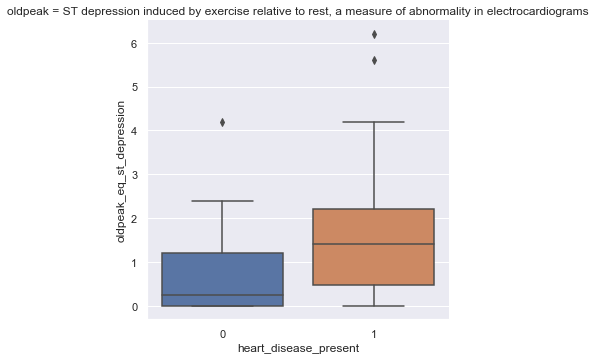

In [33]:
sns.catplot(y='oldpeak_eq_st_depression', x='heart_disease_present', kind="box", data=data)
plt.title('oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms')
plt.show()

#Possible important feature

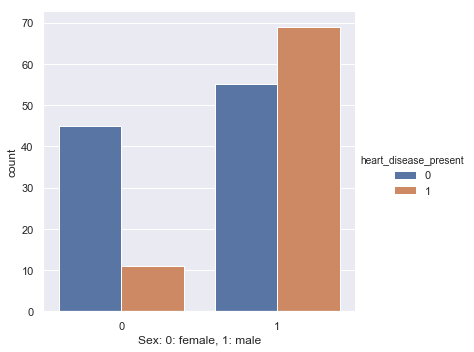

In [34]:
sns.catplot(x="sex", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Sex: 0: female, 1: male')
plt.show()

#Possible important feature

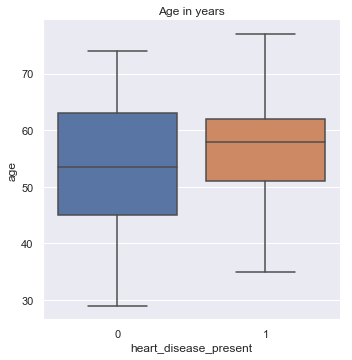

In [35]:
sns.catplot(y='age', x='heart_disease_present', kind="box", data=data)
plt.title('Age in years')
plt.show()

#Possible important feature

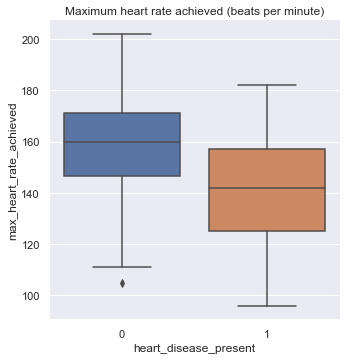

In [36]:
sns.catplot(y='max_heart_rate_achieved', x='heart_disease_present', kind="box", data=data)
plt.title('Maximum heart rate achieved (beats per minute)')
plt.show()

#Possible important feature

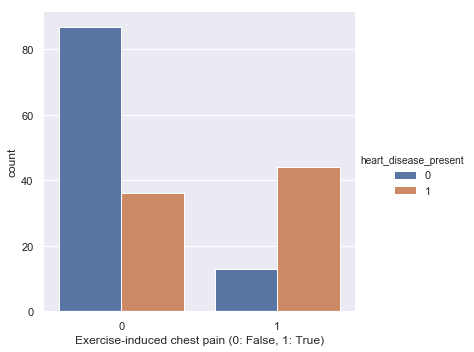

In [37]:
sns.catplot(x="exercise_induced_angina", hue="heart_disease_present", kind="count", data=data)
plt.xlabel('Exercise-induced chest pain (0: False, 1: True)')
plt.show()

#Possible important feature

In [8]:
#split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(values, labels, random_state=100, test_size=0.2)

In [56]:
#Train Logistic Regression model and predict label and probabilities to have heart desease (probability to have label 1)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train.values.ravel())
prediction = logreg.predict(X_test)
print(prediction)
pred_prob = logreg.predict_proba(X_test)[:,1]
pred_prob = [round(i,1) for i in pred_prob]
print(pred_prob)

#Calculate logarithmic loss evaluation metric
print('score', log_loss(y_test, prediction))

[0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0]
[0.1, 0.0, 0.1, 0.2, 0.6, 0.2, 0.6, 0.2, 0.1, 0.6, 0.5, 0.8, 0.1, 0.7, 0.0, 0.9, 0.3, 0.7, 1.0, 0.0, 0.1, 0.9, 0.8, 0.0, 0.3, 0.1, 0.7, 0.1, 0.1, 0.8, 0.1, 0.9, 0.2, 0.6, 0.1, 0.2]
score 3.837664032696471


In [52]:
#import test values
test = pd.read_csv("test_values.csv")
prepare_dataset(test)
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,2,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,1,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,2,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,1,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,1,138,4,1,0,2,166,3.6,1,61,125,1


In [49]:
#Predict labels for train values
predictions = logreg.predict_proba(test.iloc[:, 1:])[:,1]
predictions = [round(i,1) for i in predictions]
print(predictions)

[0.3, 0.1, 1.0, 0.1, 0.9, 0.1, 0.2, 0.9, 0.1, 0.2, 0.4, 0.6, 0.3, 1.0, 0.1, 0.0, 0.0, 0.1, 0.9, 0.1, 0.9, 0.2, 0.2, 0.0, 0.4, 0.8, 0.4, 0.2, 0.5, 0.1, 0.9, 0.2, 0.2, 0.5, 0.1, 0.1, 0.2, 0.4, 0.2, 0.1, 0.9, 0.0, 0.9, 0.1, 0.9, 0.1, 0.1, 0.1, 0.2, 0.7, 0.8, 0.1, 1.0, 0.1, 0.3, 0.0, 0.9, 0.2, 0.4, 0.3, 0.1, 0.9, 0.2, 1.0, 0.1, 0.9, 0.8, 0.4, 0.6, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 0.6, 0.2, 0.7, 0.4, 0.1, 0.6, 0.7, 0.2, 0.0, 0.6, 0.4, 0.4, 0.2]


In [51]:
#Create submission file
Submission = pd.DataFrame({ 'patient_id': test['patient_id'].tolist(),
                            'heart_disease_present': predictions})
Submission.to_csv("Submission.csv", index=False)